In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import serial
import datetime

In [11]:
ser=serial.Serial("/dev/ttyACM1",115200,timeout=2)
ser.baudrate=115200

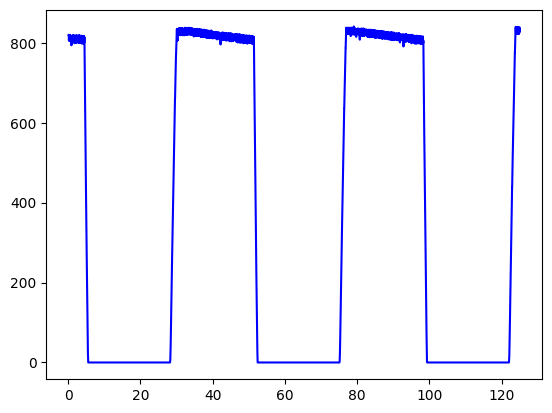

In [53]:
G = 1
ser.write(bytearray(str(G),'ascii'))
ser.write(bytearray('1','ascii'))
A = ser.readline()
B = ser.readline()
C = ser.readline()
assert C == b'----------Start of ACQ----------\r\n'
F = []
while True: # Run forever

    read_ser=ser.readline()
    if (read_ser != b''):
        F.append(read_ser)
    else:
        break
S = str(F[0])[2:].split(",")[:-1]
signal = [int(x,16)for x in S]
t = [x/64.0 for x in range(len(signal))]
f = [k*64/len(signal) for k in range(len(signal))]
plt.plot(t[10:],signal[10:],"b",label="Signal")


In [49]:
0x8C

140

In [47]:
2**8

256

In [42]:
S

['7D',
 '7D',
 '82',
 '86',
 '86',
 '79',
 '8C',
 'FE',
 'D',
 '74',
 '74',
 '84',
 '84',
 '89',
 '87',
 '7F',
 '75',
 '72',
 '72',
 '79',
 '81',
 '88',
 '8B',
 '7E',
 '7E',
 '73',
 '72',
 '78',
 '80',
 '8A',
 '8A',
 '84',
 '7B',
 '73',
 '74',
 '82',
 '82',
 '88',
 '89',
 '81',
 '78',
 '75',
 '75',
 '80',
 '86',
 '8B',
 '88',
 '77',
 '77',
 '73',
 '78',
 '80',
 '87',
 '88',
 '88',
 '7D',
 '75',
 '73',
 '79',
 '88',
 '88',
 '89',
 '82',
 '78',
 '72',
 '7C',
 '7C',
 '86',
 '8A',
 '89',
 '80',
 '77',
 '77',
 '77',
 '7E',
 '86',
 '8A',
 '88',
 '76',
 '76',
 '72',
 '78',
 '80',
 '87',
 '88',
 '88',
 '7B',
 '74',
 '74',
 '7B',
 '88',
 '88',
 '88',
 '81',
 '77',
 '72',
 '7D',
 '7D',
 '85',
 '8A',
 '89',
 '81',
 '73',
 '73',
 '76',
 '7F',
 '86',
 '8B',
 '7F',
 '7F',
 '75',
 '73',
 '79',
 '82',
 '8B',
 '8B',
 '85',
 '7B',
 '74',
 '75',
 '83',
 '83',
 '8B',
 '8A',
 '82',
 '78',
 '74',
 '74',
 '7E',
 '85',
 '8A',
 '8A',
 '82',
 '74',
 '74',
 '77',
 '80',
 '86',
 '8B',
 '7E',
 '7E',
 '74',
 '74',


In [ ]:
plt.plot(t[10:100],signal[10:100],"b",label="Signal")

Check:  0 False
Check:  1 False
Check:  2 False
Check:  3 False
Check:  4 False
Check:  5 False
Check:  6 False
Check:  7 False
Check:  8 False
Check:  9 False


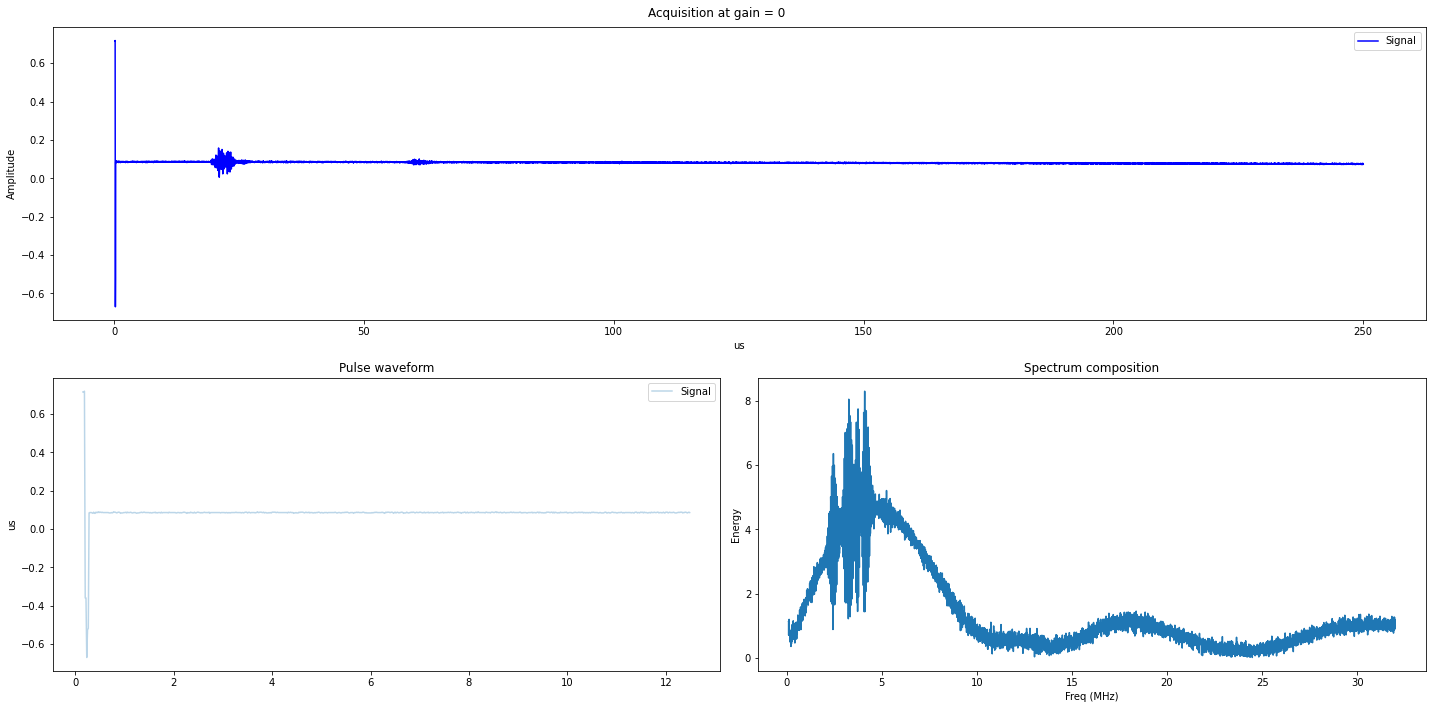

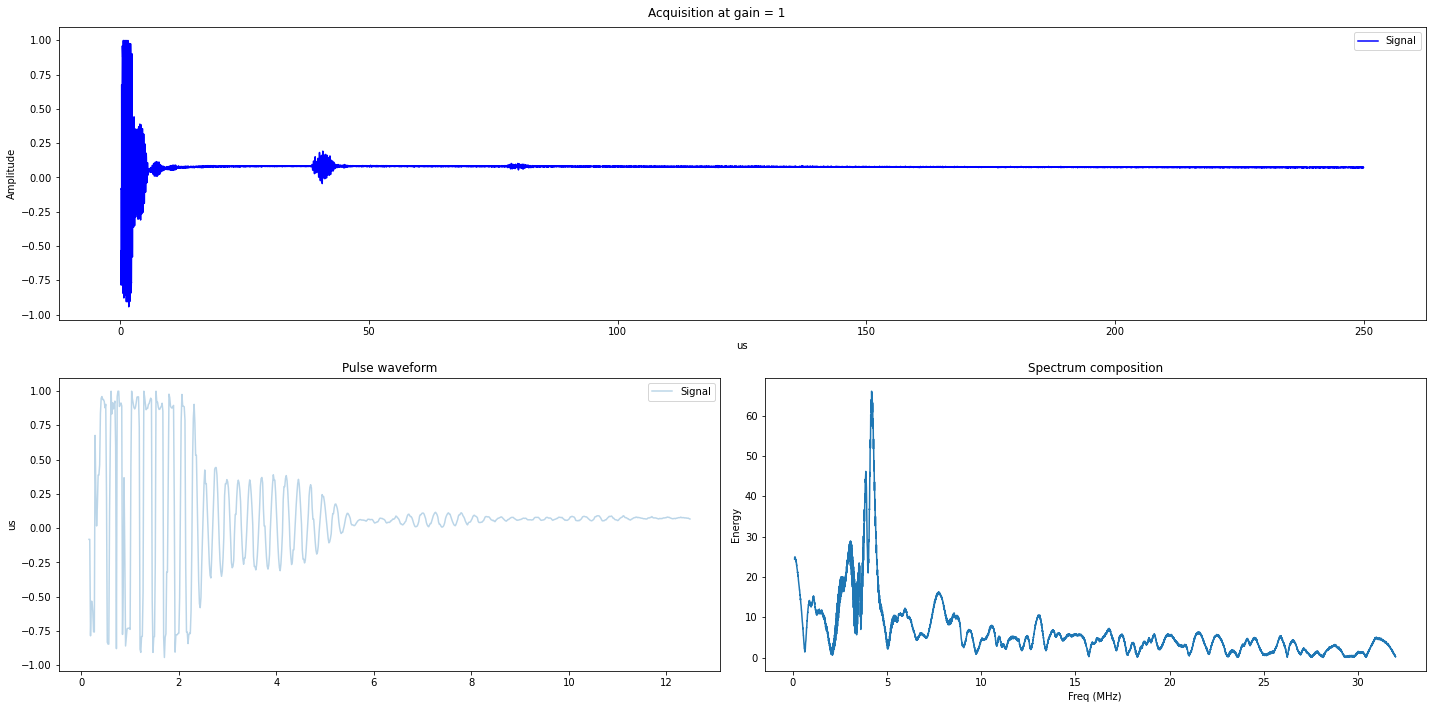

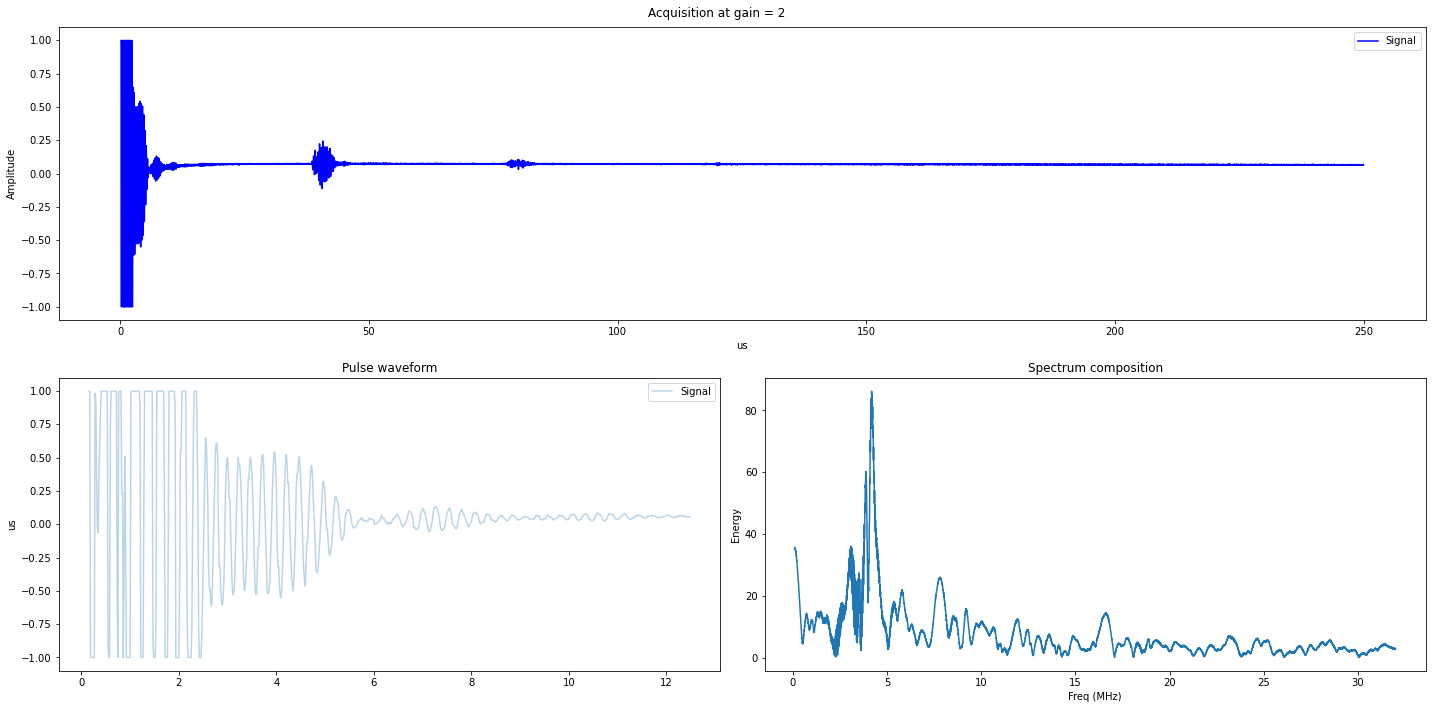

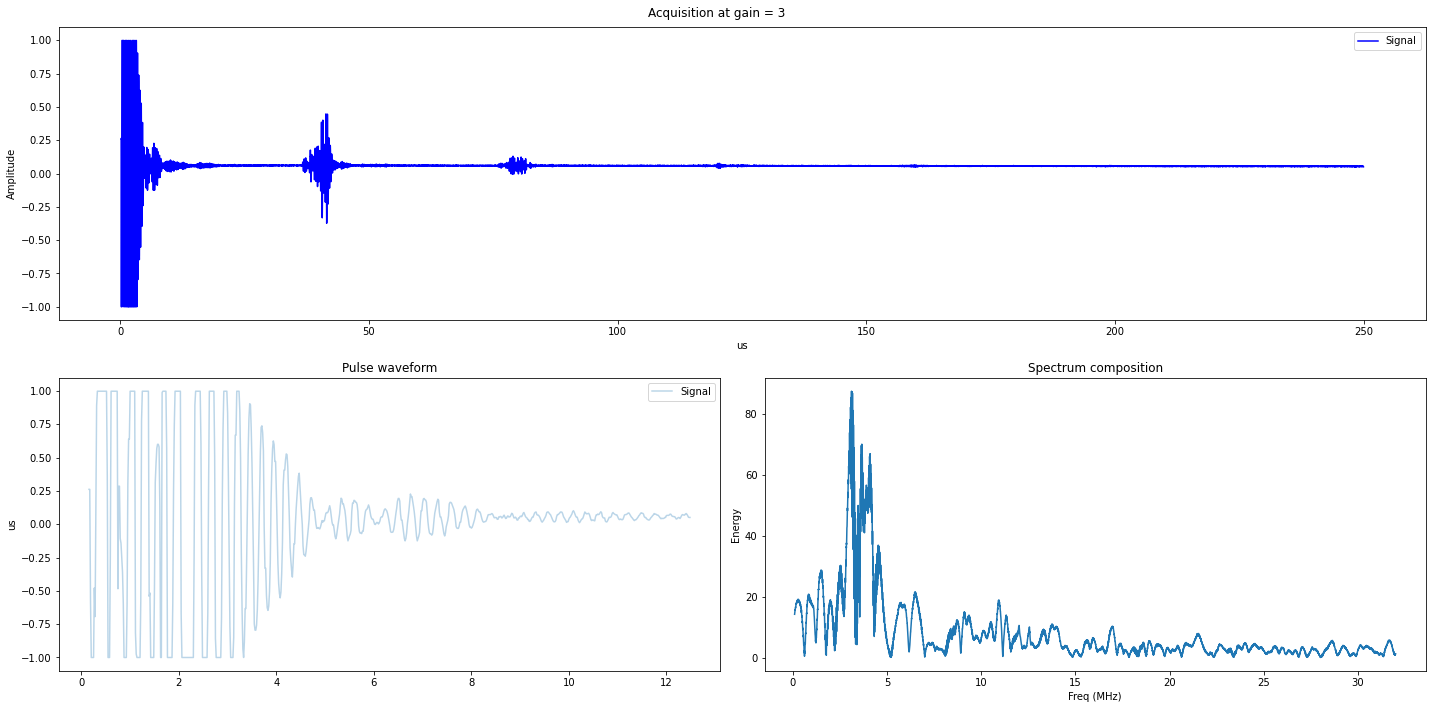

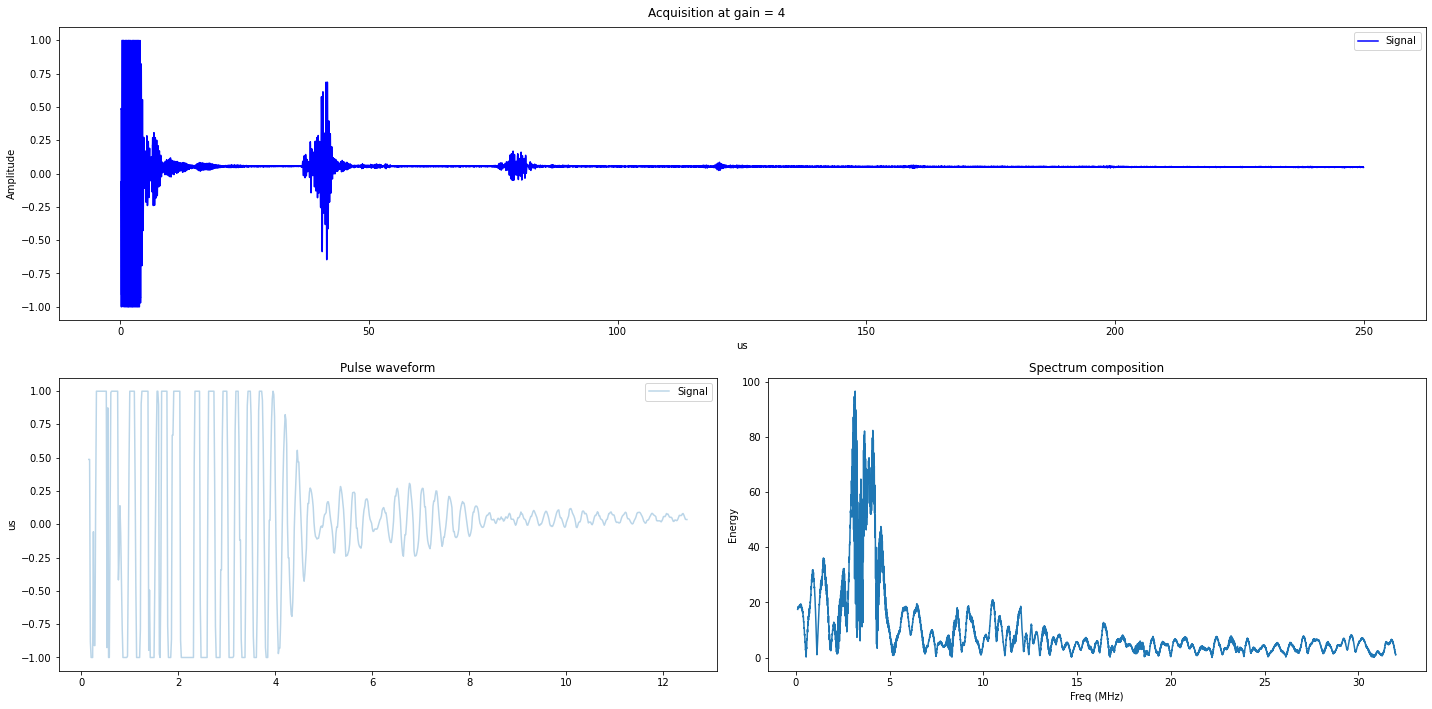

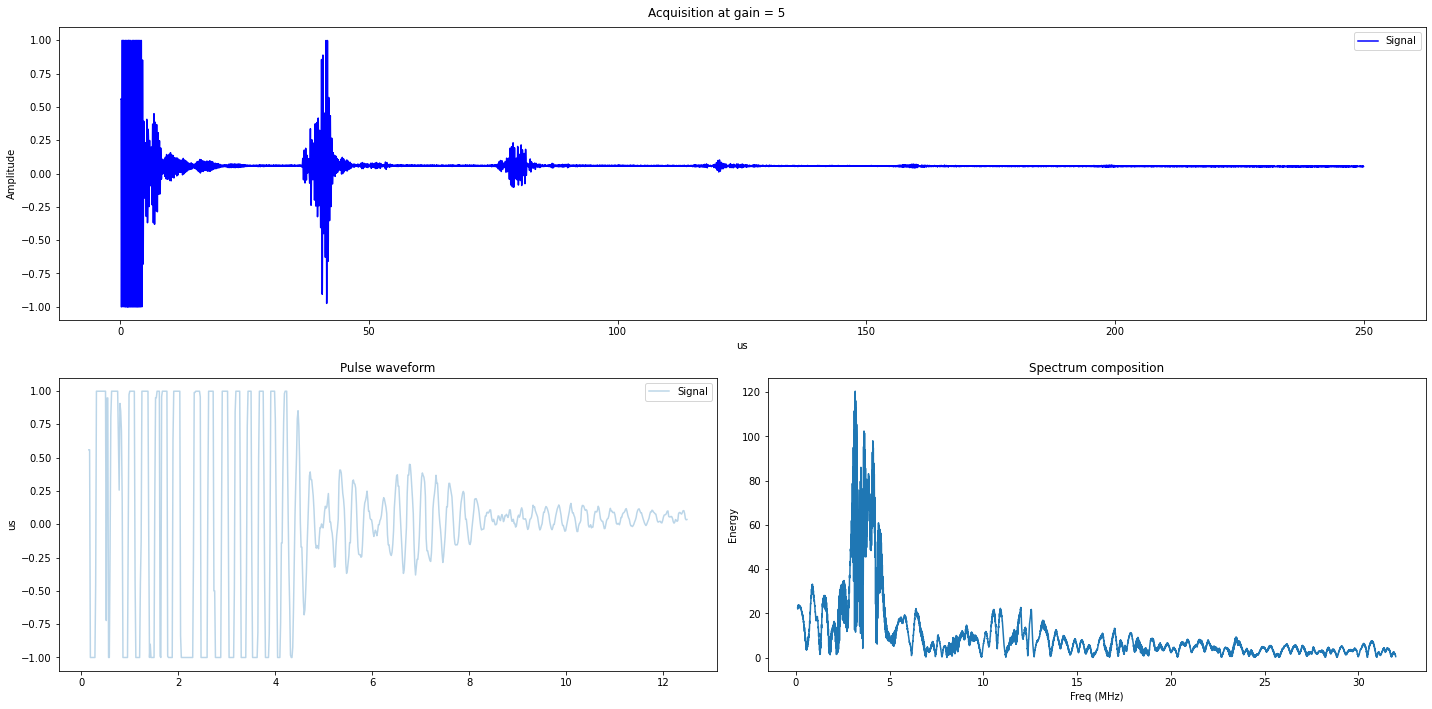

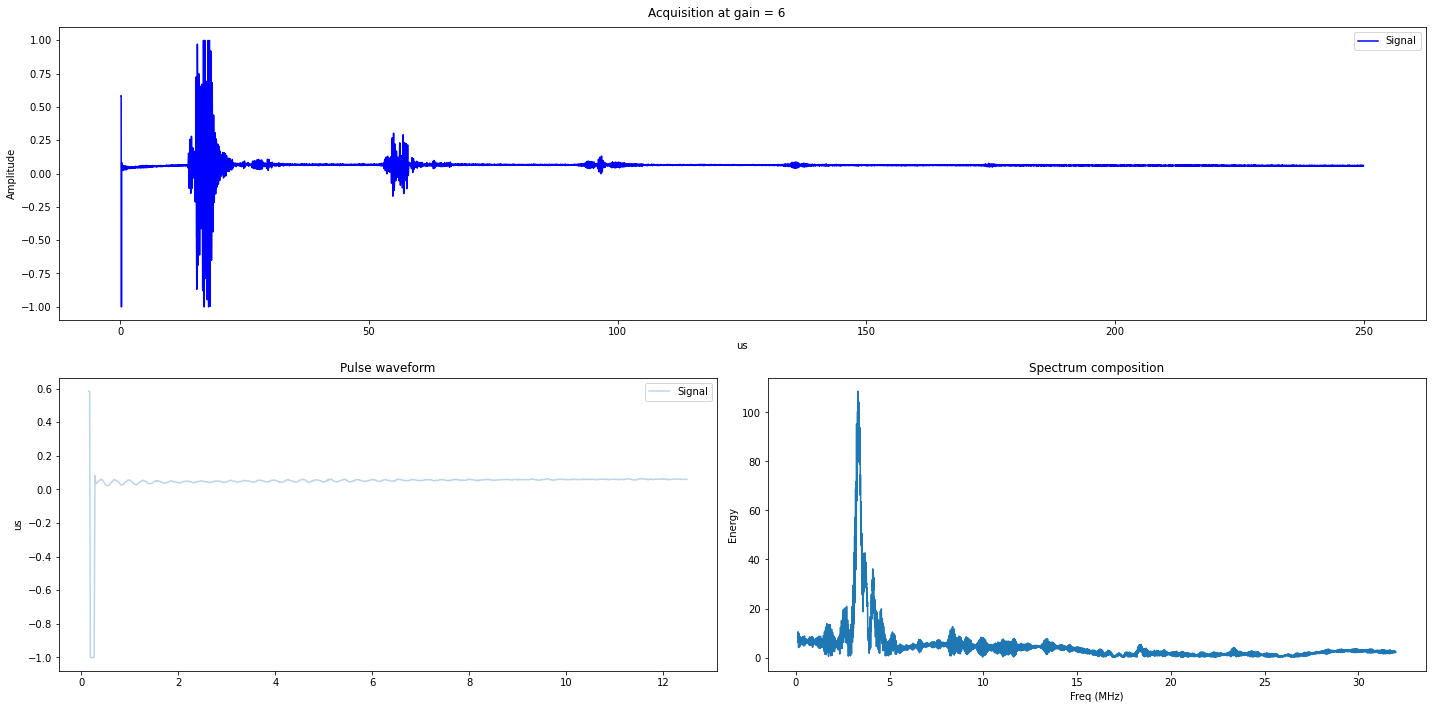

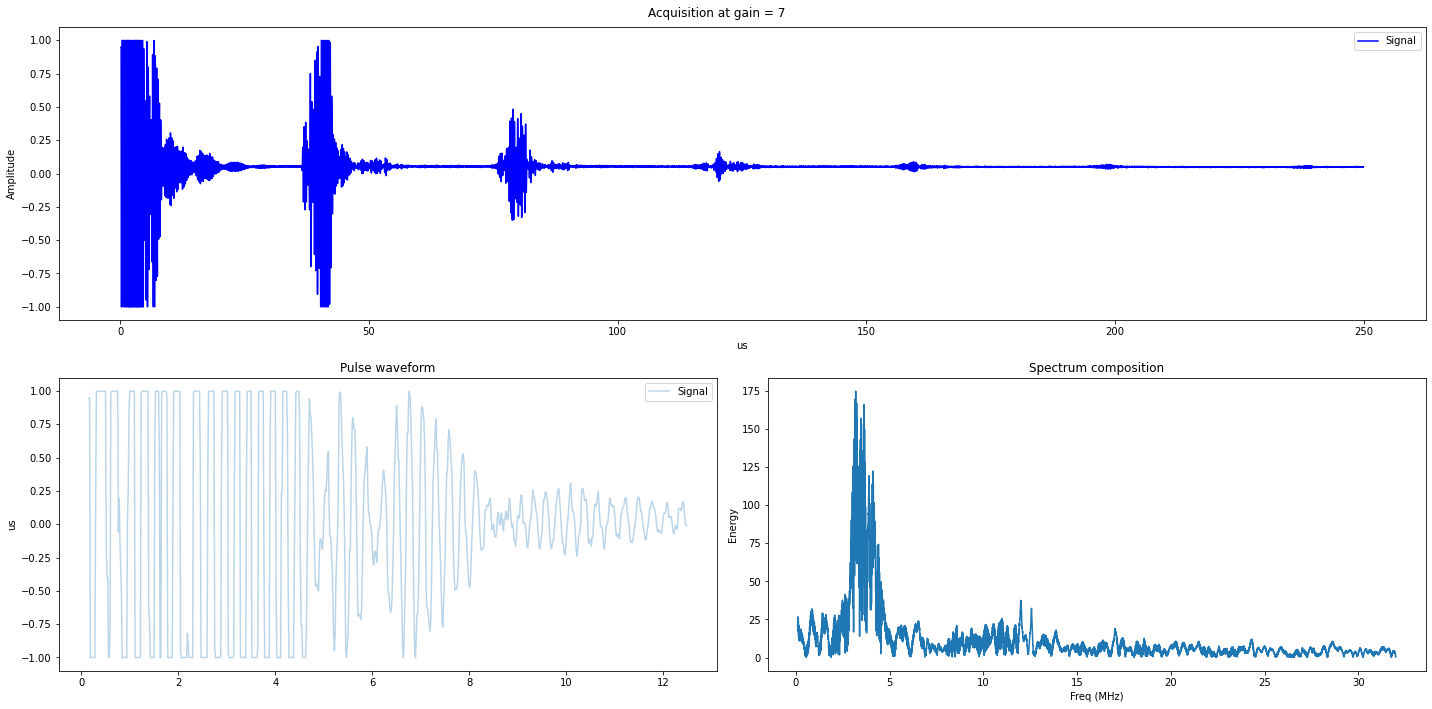

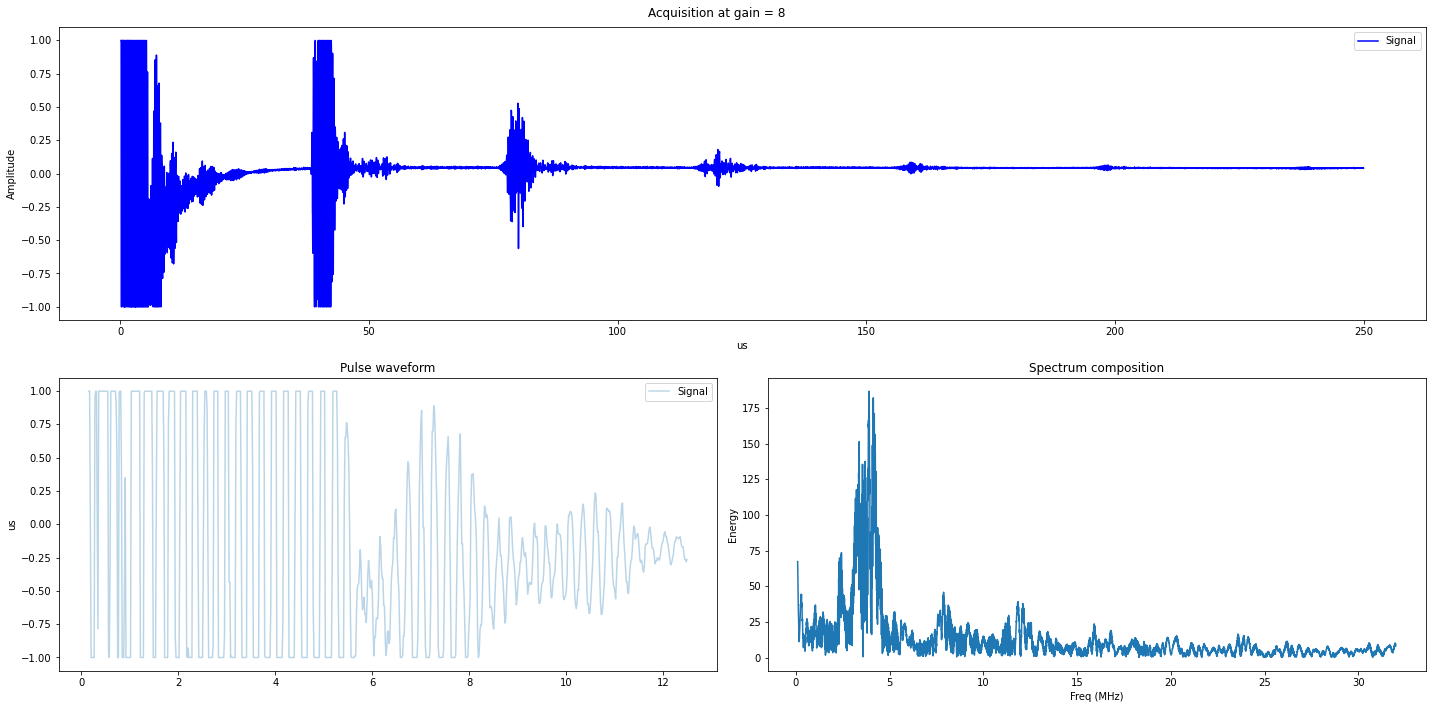

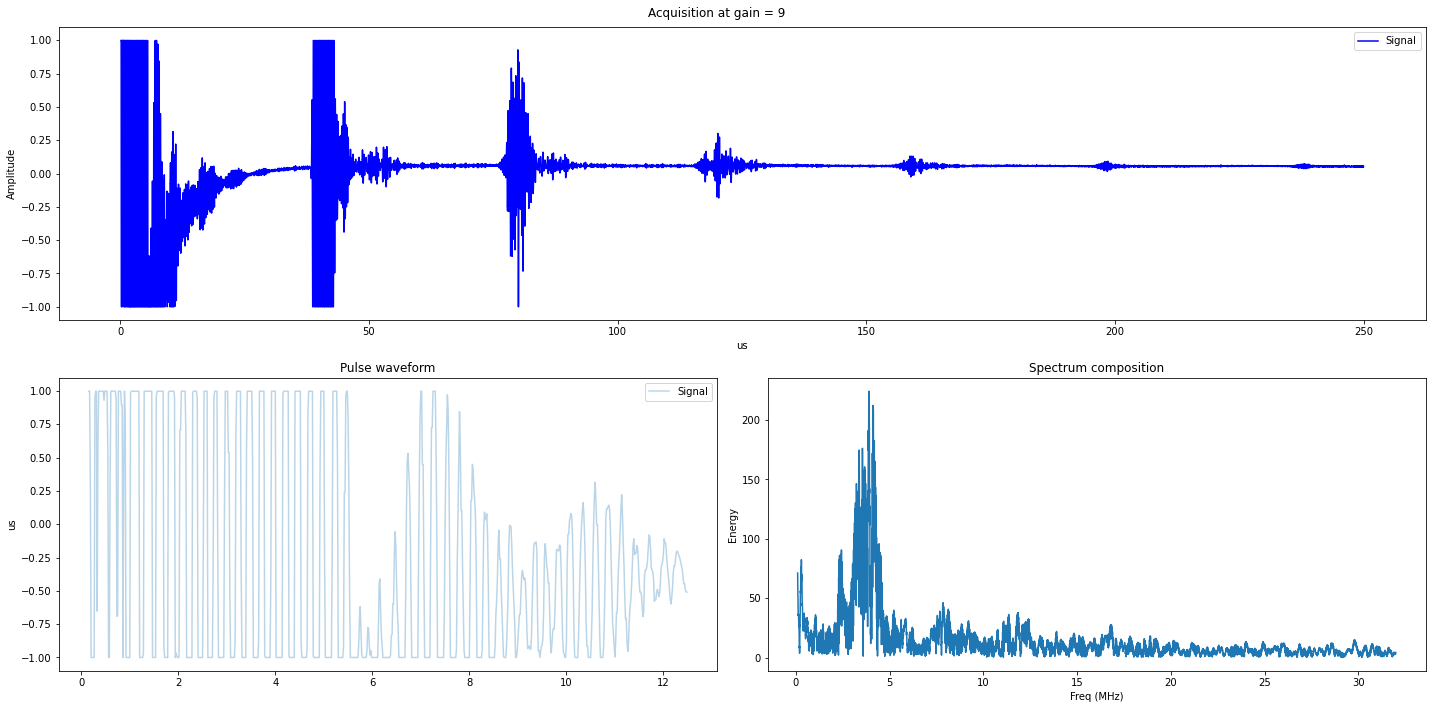

In [51]:
for G in range (10):
    ser.write(bytearray(str(G),'ascii'))
    ser.write(bytearray('1','ascii'))
    A = ser.readline()
    B = ser.readline()
    C = ser.readline()
    assert C == b'----------Start of ACQ----------\r\n'
    F = []
    while True: # Run forever

        read_ser=ser.readline()
        if (read_ser != b''):
            F.append(read_ser)
        else:
            break
    print("Check: ",G,len(F[0]) == 64002)

    now = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
    S = str(F[0])[2:].split(",")[:-1]
    signal = [(int(x,16)-512)/512.0 for x in S]
    t = [x/64.0 for x in range(len(signal))]
    f = [k*64/len(signal) for k in range(len(signal))]

    data = {"signal":signal,"t":t,"f":f,"gain":G,"timestamp":now}

    m=800

    FFT = np.abs(np.fft.fft(signal))

    plt.figure(figsize=(20,10))
    plt.subplot(2, 1, 1)

    plt.plot(t[10:],signal[10:],"b",label="Signal")
    plt.xlabel("us")
    plt.ylabel("Amplitude")
    plt.legend()
    title = "Acquisition at gain = " + str(G)

    plt.subplot(2, 2, 3)
    plt.plot(t[10:m],signal[10:m],alpha=0.3,label="Signal")
    plt.title('Pulse waveform')
    plt.ylabel('V')
    plt.ylabel('us')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.title('Spectrum composition')
    plt.plot(f[25:len(FFT)//2],FFT[25:len(FFT)//2])
    plt.xlabel('Freq (MHz)')
    plt.ylabel('Energy')

    plt.suptitle(title)
    plt.tight_layout()
    #plt.savefig("imgs/pic0gain_at_"+str(G)+".jpg")
    #np.savez_compressed("imgs/pic0gain_at_"+str(G), **data )

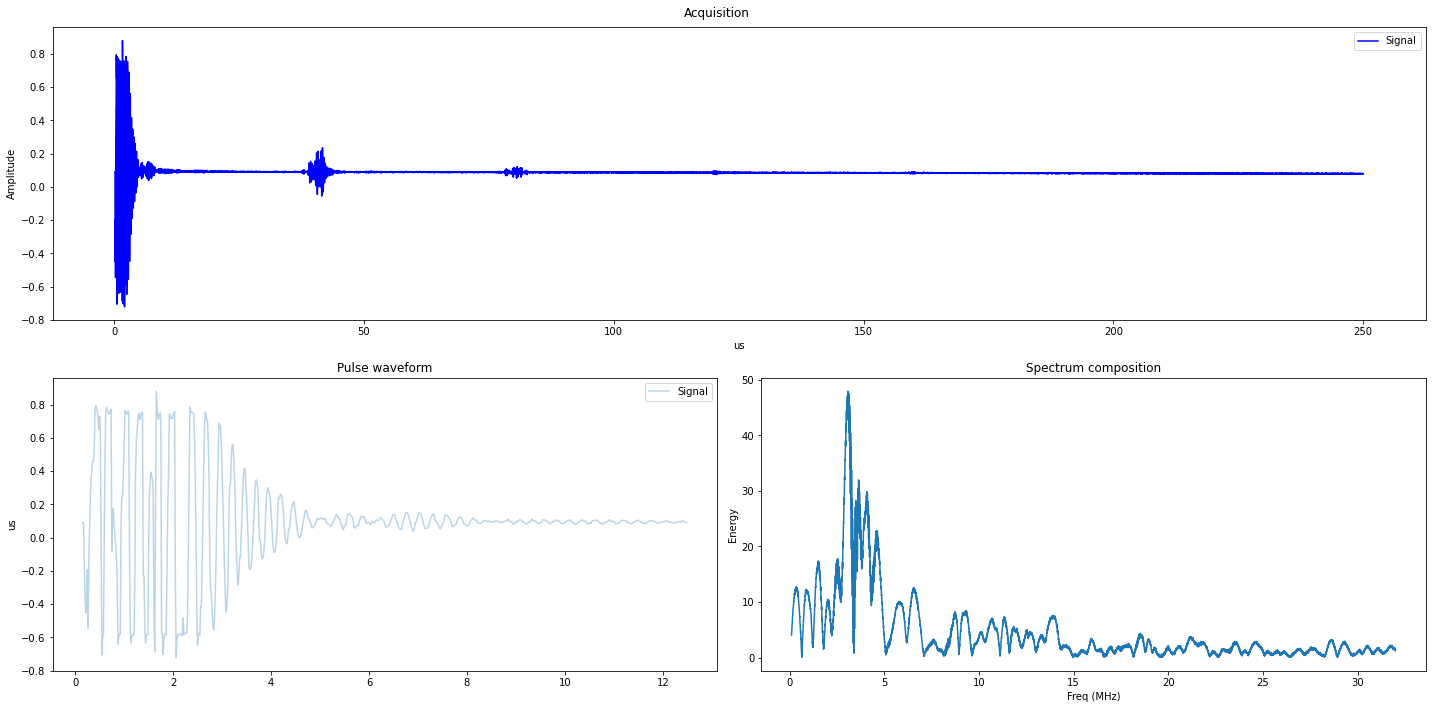